In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import random
import torch
import math as m 
import torch.nn as nn 

# Part 1 Regression

In [2]:
# load data 
df = pd.read_csv("/content/drive/MyDrive/STA2453/french_motor.csv")

In [3]:
df = df.iloc[:, 1:]  # ignore the first column
df

,y,dens,y_log,labs
0,35451.747240,4.046257,10.475928,1
1,16.362180,7.708510,2.794973,1
2,100934.976941,6.327748,11.522232,1
3,126796.075506,7.394835,11.750335,1
4,76033.109640,5.913631,11.238924,1
...,...,...,...,...
4995,1398.725779,7.330849,7.243317,3
4996,1257.552408,9.055565,7.136923,3
4997,1260.406550,5.300104,7.139190,3
4998,1227.585791,6.902794,7.112805,3


In [4]:
# check missing values
df.isna().sum()
# drop missing values
df.dropna()
# fill missing values
#df.fillna(value=None)

,y,dens,y_log,labs
0,35451.747240,4.046257,10.475928,1
1,16.362180,7.708510,2.794973,1
2,100934.976941,6.327748,11.522232,1
3,126796.075506,7.394835,11.750335,1
4,76033.109640,5.913631,11.238924,1
...,...,...,...,...
4995,1398.725779,7.330849,7.243317,3
4996,1257.552408,9.055565,7.136923,3
4997,1260.406550,5.300104,7.139190,3
4998,1227.585791,6.902794,7.112805,3


In [5]:
# check duplicate values
df.duplicated().sum()
# remove duplicate values
df.drop_duplicates()

,y,dens,y_log,labs
0,35451.747240,4.046257,10.475928,1
1,16.362180,7.708510,2.794973,1
2,100934.976941,6.327748,11.522232,1
3,126796.075506,7.394835,11.750335,1
4,76033.109640,5.913631,11.238924,1
...,...,...,...,...
4995,1398.725779,7.330849,7.243317,3
4996,1257.552408,9.055565,7.136923,3
4997,1260.406550,5.300104,7.139190,3
4998,1227.585791,6.902794,7.112805,3


In [6]:
# Normalize columns 'dens' and 'y_log'.
norm_df = df.copy()
norm_df['dens'] = (norm_df['dens'] - norm_df['dens'].mean())/norm_df['dens'].std()   
norm_df['y_log'] = (norm_df['y_log'] - norm_df['y_log'].mean())/norm_df['y_log'].std() 
norm_df

,y,dens,y_log,labs
0,35451.747240,-1.170450,0.935390,1
1,16.362180,0.711539,-1.102015,1
2,100934.976941,0.001982,1.212926,1
3,126796.075506,0.550345,1.273432,1
4,76033.109640,-0.210828,1.137778,1
...,...,...,...,...
4995,1398.725779,0.517464,0.077926,3
4996,1257.552408,1.403775,0.049705,3
4997,1260.406550,-0.526113,0.050306,3
4998,1227.585791,0.297491,0.043307,3


[Text(0.5, 1.0, 'Scatter plot of y_log vs. dens')]

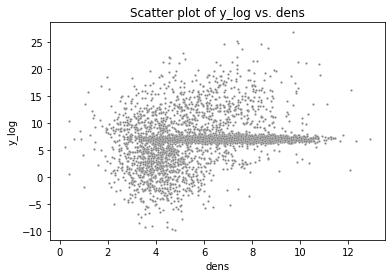

In [7]:
# plots
sns.scatterplot(x=df["dens"], y = df["y_log"], color = 'grey', s = 5.0).set(title="Scatter plot of y_log vs. dens")

In [8]:
# numpy matrices
X = df[['dens']]
y = df['y_log'] 
labs = df["labs"]

In [9]:
# Fit three simple linear regressions
lm1 = LinearRegression()
lm1.fit(X,y)
df['y_hat_1'] = lm1.predict(X)
df['lm1_resid'] = y - df['y_hat_1']
# The coefficient of determination of the prediction, R^2
lm1_r2 = lm1.score(X, y)  
lm1_r2

0.04970093280837207

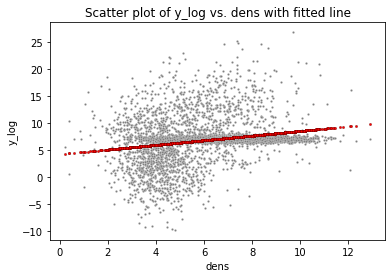

In [10]:
# Check assumptions of a linear regression model.
# 1. Check the linearity between independent and dependent variables by scatter plot.
sns.scatterplot(x=df["dens"], y = df["y_log"], color = 'grey', s = 5.0).set(title="Scatter plot of y_log vs. dens with fitted line")
# add fitted line
sns.scatterplot(x = df["dens"], 
                y = df["y_hat_1"], 
                color = "red", 
                s = 6,
                edgecolor = "black")

In [11]:
# 2. Check Homoscedasticity by the White Test.
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
exog = sm.add_constant(X)
white_test = het_white(df['lm1_resid'], exog)
# define labels to use for output of White Test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
# print results of White Test
print(dict(zip(labels, white_test)))
# p-value < 0.05 -> reject the null hypothesis H0: Homoscedasticity is present
# Thus, this model does NOT meet the Homoscedasticity assumption.

{'Test Statistic': 253.4717383142726, 'Test Statistic p-value': 9.105658655400288e-56, 'F-Statistic': 133.42365267057187, 'F-Test p-value': 3.540444346779962e-57}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


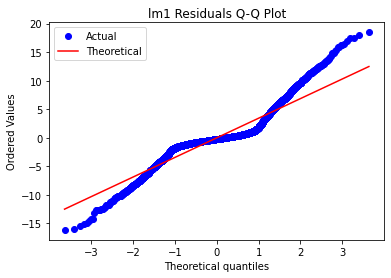

In [12]:
# 3. Check No Multicollinearity.
# Since we only have one independent variable, so no need to check this.

# 4. Check Normality for errors by normal Q-Q plot and distributions of residuals plot.
stats.probplot(df['lm1_resid'], dist="norm", plot= plt)
plt.title("lm1 Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
# The data points are NOT closely following the straight line at a 45% angle upward.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of Residuals')]

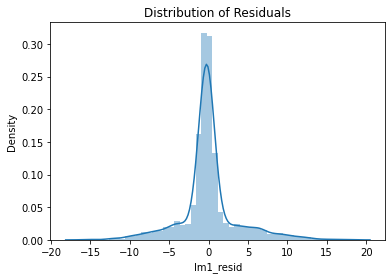

In [13]:
# Plot the distribution of residuals.
sns.distplot(df['lm1_resid']).set(title="Distribution of Residuals")

# Part 2 Logistic and Weighted Linear Regression

In [14]:
# Fit a logistic regression using 'dens' and 'labs'. 
log_model = LogisticRegression()
log_model.fit(X, labs)

# predict probability
Z = log_model.predict_proba(X)
# predict labels
labs_hat = log_model.predict(X)

# Take predicted output probabilities as weights.
weights_1 = Z[:, 0]
weights_2 = Z[:, 1]
weights_3 = Z[:, 2] 

In [15]:
# Fit a weighted linear regression model.
weighted_lm1 = LinearRegression() 
weighted_lm1.fit(X, y, sample_weight = weights_1)
weighted_lm2 = LinearRegression() 
weighted_lm2.fit(X, y, sample_weight = weights_2)
weighted_lm3 = LinearRegression() 
weighted_lm3.fit(X, y, sample_weight = weights_3)

LinearRegression()

In [16]:
# Prediction.
weighted_lm1_y_hat = weighted_lm1.predict(X)
weighted_lm2_y_hat = weighted_lm2.predict(X)
weighted_lm3_y_hat = weighted_lm3.predict(X)

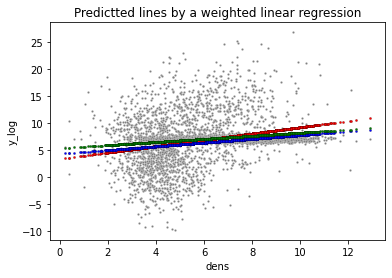

In [17]:
def plot_fitted_line(df, y_hat, color): 
  """
  Helper function for plotting predicted line.
  """
  df_copy = df.copy()
  df_copy["y_hat"] = y_hat 
  sns.scatterplot(x = df_copy["dens"], 
              y = df_copy["y_hat"], 
              color = color, 
              s = 5,
              edgecolor = "black")

# Plot the original data.
sns.scatterplot(x=df["dens"], y = df["y_log"], color = 'grey', s = 5).set(title="Predictted lines by a weighted linear regression")
# Plot the fitted lines.
plot_fitted_line(df, weighted_lm1_y_hat, "red")
plot_fitted_line(df, weighted_lm2_y_hat, "blue")
plot_fitted_line(df, weighted_lm3_y_hat, "green")

# Part 3 Finite Mixture Modelling

In [18]:
class FiniteLinearModel(nn.Module):
  """
  Class for Finite mixtures of Linear models.
  """

  def __init__(self, G: int, data: torch.Tensor, seed: int):
    """
    Constructor class for finite mixtures of linear models.
    G: total number of groups.
    """

    if not isinstance(data, torch.Tensor):
        raise Exception("data is not of torch.Tensor type")

    super(FiniteLinearModel, self).__init__()

    # define constants.
    self.n = data.shape[0]  # number of observations
    self.G = G if G > 0 else exec("raise Exception('G has to be valid')")  # number of groups

    # define data
    self.X = data[:, 1:]  # self.X = df['dens']
    # add ones column
    self.X = torch.concat((self.X, torch.ones(self.n, 1)), axis=1)
    self.y = data[:, 0]  # self.y = df['y_log']

    # first column is y, the rest are covariates.
    self.p = self.X.shape[1]  # self.p=2, 'dens' and ones

    # Set random seed for all torch use.
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

    # Randomly initialize parameters.
    self.pi = torch.rand(self.G, 1)  # define mixing proportion pi_g for each group 
    self.z = torch.rand(self.n, self.G)  # define membership weight z_ig for each observation
    self.beta = torch.rand(self.G, self.p)  # estimated coefficients for weighted linear regression; dens -> y_log
    # each group follows a different Gaussian distribution
    # -> different mu's and sigma's for each group
    self.mu = torch.rand(self.G, 1)
    self.sigma = torch.rand(self.G, 1).abs()

    self.leading_constants = - 0.5 * torch.Tensor([2.0 * torch.pi]).log()  # log(sqrt(2pi))

  def log_density(self) -> torch.Tensor:
    """
    Take in a covariate dataset X, and sample y.
    Use X to estimate mu; mu_g = y_hat predicted by the fitted weighted linear regression.
    Compute an (n x G) matrix of log Gaussian densities.
    """

    # Calculate log density matrix n x G.
    log_dens = torch.zeros(self.n, self.G)

    # Loop through the groups.
    for g in range(self.G):

        # Estimate mu by the fitted weighted linear regression.
        estimated_mu = (self.beta[g] * self.X).sum(-1)

        # Compute exponential terms.
        exp_terms = - 0.5 * ((self.y - estimated_mu) / self.sigma[g]).pow(2)
        
        # Add each log component.
        log_dens[:, g] = exp_terms + self.leading_constants
        log_dens[:, g] += - self.sigma[g].log()

    return log_dens

  def Estep(self):
    """
    Computes the expectation step using parameters for X ,y.
    """
    dens = self.log_density().exp()  # density matrix n x G

    numerator = dens * self.pi.T  # multiply by mixing proportion pi_g for each group

    denominator = numerator.sum(-1).unsqueeze(-1)
  
    # update the membership weight z_ig
    self.z = dens / denominator

  def Mstep(self):
    """
    Use the membership weights and the data to calculate new parameter values.
    """
    # the sum of the membership weights for the gth group
    n_g = self.z.sum(dim = 0)

    # mixing proportion pi_g for each group
    self.pi = n_g / self.n

    # Fit a weighted linear regression model for each group g to eatimate u_g and sigma_g.
    for g in range(self.G):
      z_g = self.z[:, g]
      weighted_lm = LinearRegression()
      weighted_lm.fit(self.X, self.y, sample_weight = z_g)
      # update coefficients
      self.beta[g, :] = torch.Tensor(weighted_lm.coef_) 
      # use the fitted weighted linear regression to estimate u_g
      predicted_mu = weighted_lm.predict(self.X)
      # update u_g
      self.mu[g] = torch.sum(torch.Tensor(predicted_mu)) / n_g[g]
      # update sigma_g
      self.sigma[g] = torch.sqrt(torch.sum(z_g * (self.y - self.mu[g])**2) / n_g[g])
  
  def objective_fn(self):      
    # Compute the density matrix n x G. 
    dens = self.log_density().exp()

    obj_func = -((dens * self.z).sum(-1).log()).sum() 
    
    return obj_func
  
  def BIC(self):
    """
    Calculate the Bayesian Information Criterion for model performance comparisons.
    """
    # Calculate the number of parameters. 
    rho = self.mu.numel() + self.sigma.numel() + self.z.numel()
    # Calculate BIC.
    bic = self.objective_fn() * (-2.0) - rho * m.log(self.y.shape[0])

    return float(bic.detach()) 
  
  def train(self, max_iterations):
    """
    Run the EM algorithm to predict the labels for each observation.
    """
    for i in range(max_iterations + 1):
      self.Estep()
      self.Mstep()
      
      # Label each observation by the greatest weight.
      predict_label = torch.argmax(self.z, dim=1) + 1  
      # Transform labels into a numpy.array.
      predict_label = predict_label.detach().numpy().astype(int)

      # Check membership sizes and BIC for every 100 iterations.
      if i % 100 == 0:
        print(f"Membership sizes for the {i+1}th iteration:")
        print(pd.Series(predict_label).value_counts())  
        print(f"BIC for the {i+1}th iteration: {self.BIC()}") 
        print("\n")
        
    return predict_label 

Membership sizes for the 1th iteration:
1    3193
2    1543
3     264
dtype: int64
BIC for the 1th iteration: -125109.6171875




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)


Membership sizes for the 101th iteration:
1    2774
2    1508
3     718
dtype: int64
BIC for the 101th iteration: -128899.4140625


Membership sizes for the 201th iteration:
1    2875
2    1268
3     857
dtype: int64
BIC for the 201th iteration: -132367.0


Membership sizes for the 301th iteration:
1    2929
3    1327
2     744
dtype: int64
BIC for the 301th iteration: -129763.359375


Membership sizes for the 401th iteration:
1    3023
2    1271
3     706
dtype: int64
BIC for the 401th iteration: -128243.6328125


Membership sizes for the 501th iteration:
1    2868
3    1367
2     765
dtype: int64
BIC for the 501th iteration: -134039.296875


Membership sizes for the 601th iteration:
1    3124
2     987
3     889
dtype: int64
BIC for the 601th iteration: -133303.578125


Membership sizes for the 701th iteration:
1    3053
2    1093
3     854
dtype: int64
BIC for the 701th iteration: -132801.21875


Membership sizes for the 801th iteration:
1    2776
3    1700
2     524
dtype: int64
BI

[Text(0.5, 1.0, 'Plot the dataset colored by the assigned labels of the fitted mixture model')]

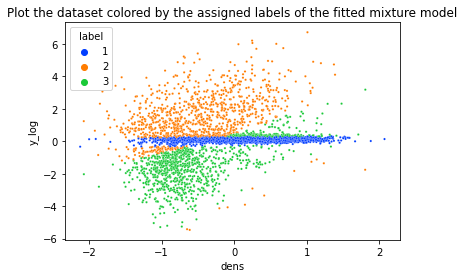

In [19]:
# Tranform the data set into a tensor.
data_df = df.copy()
data_s = data_df[['y_log','dens']].to_numpy()
data_s = torch.Tensor(data_s)

# Normalize the data.
data_s = (data_s - data_s.mean())/data_s.std()  

# Define GMM model. 
G = 3 
seed = 101  # Set random seed.
flm = FiniteLinearModel(G=G, data=data_s, seed = seed)

# Train the GMM model by EM alorithm.
num_iterations = 4700  # Set number of iterations.
labels = flm.train(num_iterations)

# Transform data_s into a pd dataframe
data_s = pd.DataFrame(data_s.detach().numpy())
data_s['label'] = labels
data_s.columns = ['y_log', 'dens', 'label']

# Plot the dataset colored by the assigned labels of the fitted mixture model.
sns.scatterplot(data=data_s, x='dens', y='y_log', hue="label", palette = 'bright', s = 5).set(title="Plot the dataset colored by the assigned labels of the fitted mixture model")

In [20]:
# Check the true labels in the orginal data set.
true_labels = df['labs'].value_counts()
print("True membership sizes:")
print(true_labels)

True membership sizes:
3    3000
1    1000
2    1000
Name: labs, dtype: int64
